<a href="https://colab.research.google.com/github/splitneutron/lab_tree_stability/blob/main/lab_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab: Trees and Model Stability

Trees are notorious for being **unstable**: Small changes in the data can lead to noticeable or large changes in the tree. We're going to explore this phenomenon, and a common rebuttal.

In the folder for this lab, there are three datasets that we used in class: Divorce, heart failure, and the AirBnB price dataset.

1. Pick one of the datasets and appropriately clean it.
2. Perform a train-test split for a specific seed (save the seed for reproducibility). Fit a classification/regression tree and a linear model on the training data and evaluate their performance on the test data. Set aside the predictions these models make.
3. Repeat step 2 for three to five different seeds (save the seeds for reproducibility). How different are the trees that you get? Your linear model coefficients?. Set aside the predictions these models make.

Typically, you would see the trees changing what appears to be a non-trivial amount, while the linear model coefficients don't vary nearly as much. Often, the changes appear substantial.

But are they?

4. Instead of focusing on the tree or model coefficients, do three things:
    1. Make scatterplots of the predicted values on the test set from question 2 against the predicted values for the alternative models from part 3, separately for your trees and linear models. Do they appear reasonably similar?
    2. Compute the correlation between your model in part 2 and your alternative models in part 3, separately for your trees and linear models. Are they highly correlated or not?
    3. Run a simple linear regression of the predicted values on the test set from the alternative models on the predicted values from question 2, separately for your trees and linear models. Is the intercept close to zero? Is the slope close to 1? Is the $R^2$ close to 1?

5. Do linear models appear to have similar coefficients and predictions across train/test splits? Do trees?
6. True or false, and explain: "Even if the models end up having a substantially different appearance, the predictions they generate are often very similar."

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data cleaned in spreadsheet software
df = pd.read_csv("/content/cleaned_divorce_data.csv")

In [12]:
y = df['Divorce'] # Target variable
X = df.drop(['Divorce'], axis=1) # Features/predictors

# Split the sample:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=65) # For replication purposes

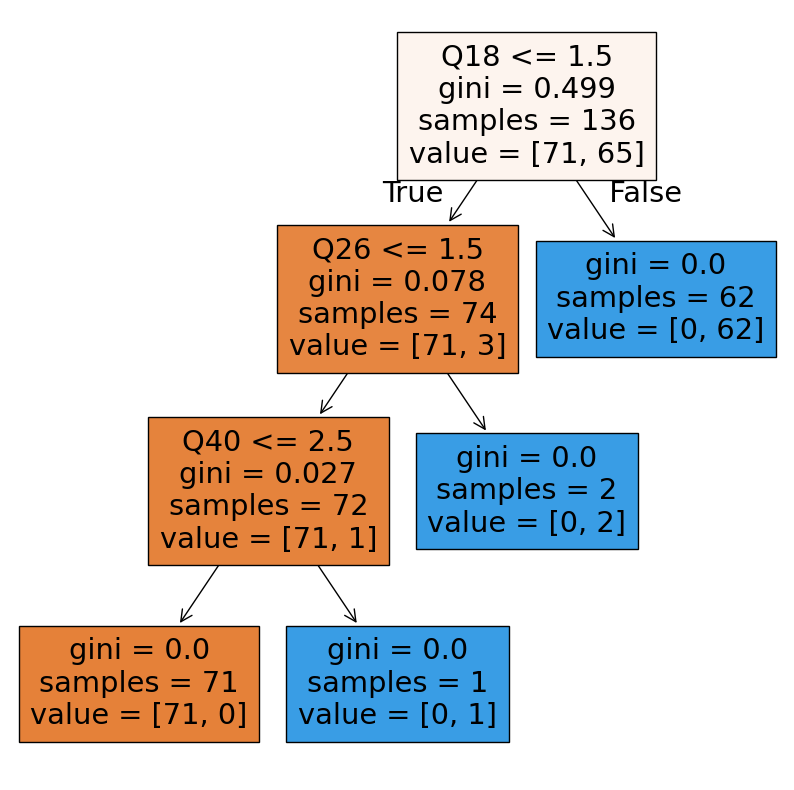

In [13]:
from sklearn.tree import DecisionTreeClassifier # Import the tree classifier
from sklearn.tree import plot_tree # Plot the tree

# Fit decision tree:
cart = DecisionTreeClassifier() # Create a classifier object
cart = cart.fit(X_train, y_train) # Fit the classifier

# Visualize results:
plt.figure(figsize=(10,10))
var_names = cart.feature_names_in_
plot_tree(cart,filled=True,feature_names=var_names)
plt.show()


In [14]:
## Make Predictions on the Test Set:
y_hat = cart.predict(X_test)

## Confusion Matrix:
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/len(y_test) # Compute Accuracy
#acc = np.trace(tab)/len(y_test)  # Faster way to compute accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

Accuracy:  1.0 



col_0,0,1
Divorce,,
0,15,0
1,0,19


In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Fit the linear model on the training data
# Using fit_intercept=False as seen in the previous LinearRegression attempt
reg_lm = LinearRegression(fit_intercept=False)
reg_lm.fit(X_train, y_train)

# Evaluate performance on the training data
print(f"Linear Model R-squared on Training Set: {reg_lm.score(X_train, y_train):.4f}")

# Display coefficients
results_lm = pd.DataFrame({'variable': reg_lm.feature_names_in_, 'coefficient': reg_lm.coef_})

# Make predictions on the test set
y_pred_lm = reg_lm.predict(X_test)

# Evaluate performance on the test data
r2_test_lm = r2_score(y_test, y_pred_lm)

print(f"\nLinear Model R-squared on Test Set: {r2_test_lm:.4f}")


Linear Model R-squared on Training Set: 0.9765

Linear Model R-squared on Test Set: 0.8569


In [20]:
# Split the sample:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=66) # For replication purposes

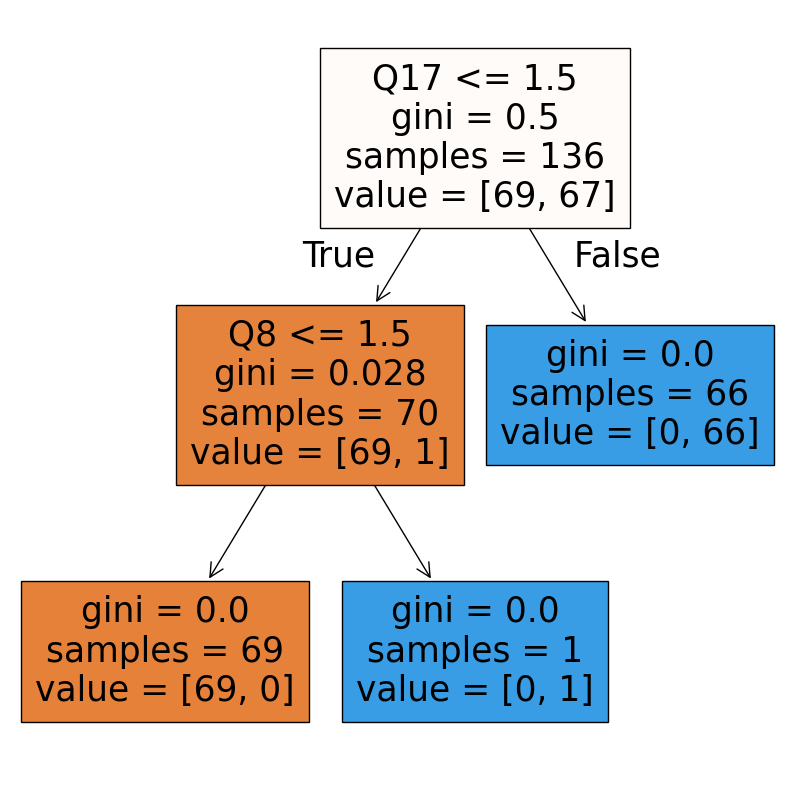

In [21]:
from sklearn.tree import DecisionTreeClassifier # Import the tree classifier
from sklearn.tree import plot_tree # Plot the tree

# Fit decision tree:
cart = DecisionTreeClassifier() # Create a classifier object
cart = cart.fit(X_train, y_train) # Fit the classifier

# Visualize results:
plt.figure(figsize=(10,10))
var_names = cart.feature_names_in_
plot_tree(cart,filled=True,feature_names=var_names)
plt.show()


In [22]:
## Make Predictions on the Test Set:
y_hat = cart.predict(X_test)

## Confusion Matrix:
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/len(y_test) # Compute Accuracy
#acc = np.trace(tab)/len(y_test)  # Faster way to compute accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

Accuracy:  0.8823529411764706 



col_0,0,1
Divorce,,
0,15,2
1,2,15


In [23]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Fit the linear model on the training data
# Using fit_intercept=False as seen in the previous LinearRegression attempt
reg_lm = LinearRegression(fit_intercept=False)
reg_lm.fit(X_train, y_train)

# Evaluate performance on the training data
print(f"Linear Model R-squared on Training Set: {reg_lm.score(X_train, y_train):.4f}")

# Display coefficients
results_lm = pd.DataFrame({'variable': reg_lm.feature_names_in_, 'coefficient': reg_lm.coef_})

# Make predictions on the test set
y_pred_lm = reg_lm.predict(X_test)

# Evaluate performance on the test data
r2_test_lm = r2_score(y_test, y_pred_lm)

print(f"\nLinear Model R-squared on Test Set: {r2_test_lm:.4f}")


Linear Model R-squared on Training Set: 0.9877

Linear Model R-squared on Test Set: 0.6870


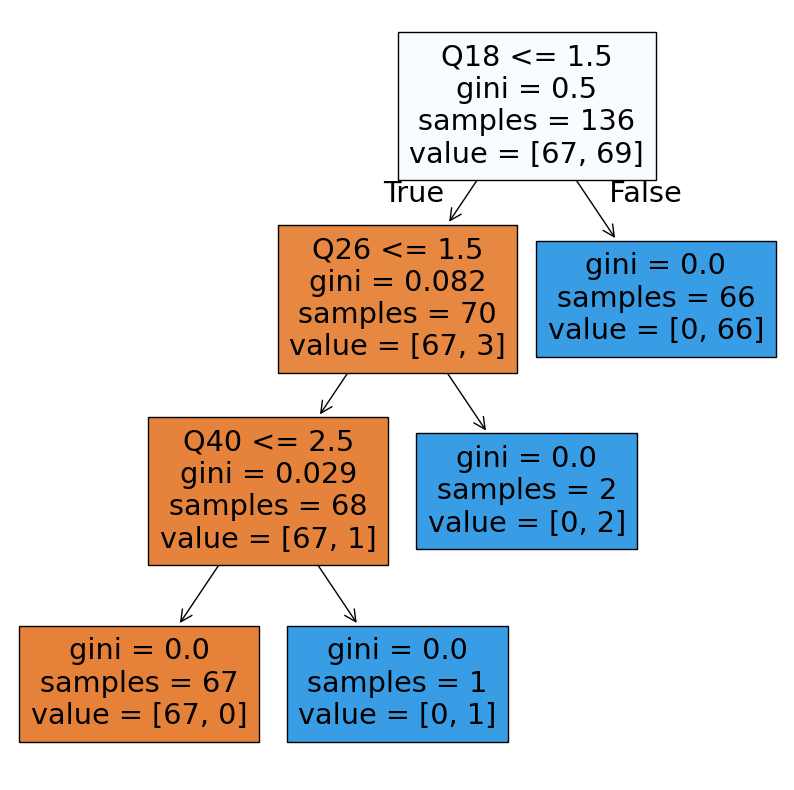

Accuracy:  1.0 

Linear Model R-squared on Training Set: 0.9712

Linear Model R-squared on Test Set: 0.9064


In [24]:
y = df['Divorce'] # Target variable
X = df.drop(['Divorce'], axis=1) # Features/predictors

# Split the sample:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=67) # For replication purposes
from sklearn.tree import DecisionTreeClassifier # Import the tree classifier
from sklearn.tree import plot_tree # Plot the tree

# Fit decision tree:
cart = DecisionTreeClassifier() # Create a classifier object
cart = cart.fit(X_train, y_train) # Fit the classifier

# Visualize results:
plt.figure(figsize=(10,10))
var_names = cart.feature_names_in_
plot_tree(cart,filled=True,feature_names=var_names)
plt.show()

## Make Predictions on the Test Set:
y_hat = cart.predict(X_test)

## Confusion Matrix:
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/len(y_test) # Compute Accuracy
#acc = np.trace(tab)/len(y_test)  # Faster way to compute accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Fit the linear model on the training data
# Using fit_intercept=False as seen in the previous LinearRegression attempt
reg_lm = LinearRegression(fit_intercept=False)
reg_lm.fit(X_train, y_train)

# Evaluate performance on the training data
print(f"Linear Model R-squared on Training Set: {reg_lm.score(X_train, y_train):.4f}")

# Display coefficients
results_lm = pd.DataFrame({'variable': reg_lm.feature_names_in_, 'coefficient': reg_lm.coef_})

# Make predictions on the test set
y_pred_lm = reg_lm.predict(X_test)

# Evaluate performance on the test data
r2_test_lm = r2_score(y_test, y_pred_lm)

print(f"\nLinear Model R-squared on Test Set: {r2_test_lm:.4f}")


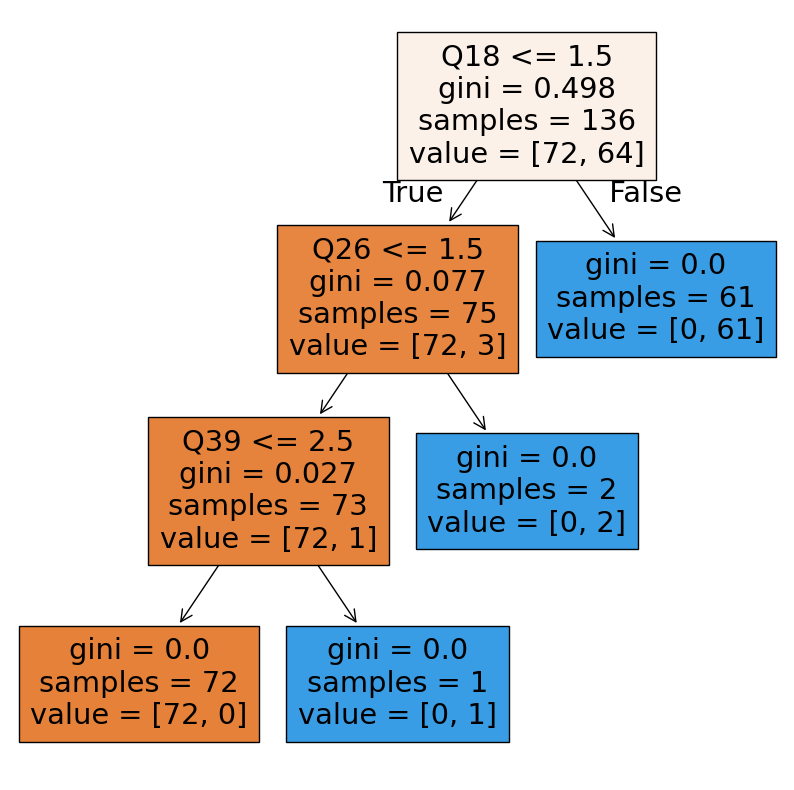

Accuracy:  0.9705882352941176 

Linear Model R-squared on Training Set: 0.9741

Linear Model R-squared on Test Set: 0.9042


In [25]:
y = df['Divorce'] # Target variable
X = df.drop(['Divorce'], axis=1) # Features/predictors

# Split the sample:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=68) # For replication purposes
from sklearn.tree import DecisionTreeClassifier # Import the tree classifier
from sklearn.tree import plot_tree # Plot the tree

# Fit decision tree:
cart = DecisionTreeClassifier() # Create a classifier object
cart = cart.fit(X_train, y_train) # Fit the classifier

# Visualize results:
plt.figure(figsize=(10,10))
var_names = cart.feature_names_in_
plot_tree(cart,filled=True,feature_names=var_names)
plt.show()

## Make Predictions on the Test Set:
y_hat = cart.predict(X_test)

## Confusion Matrix:
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/len(y_test) # Compute Accuracy
#acc = np.trace(tab)/len(y_test)  # Faster way to compute accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Fit the linear model on the training data
# Using fit_intercept=False as seen in the previous LinearRegression attempt
reg_lm = LinearRegression(fit_intercept=False)
reg_lm.fit(X_train, y_train)

# Evaluate performance on the training data
print(f"Linear Model R-squared on Training Set: {reg_lm.score(X_train, y_train):.4f}")

# Display coefficients
results_lm = pd.DataFrame({'variable': reg_lm.feature_names_in_, 'coefficient': reg_lm.coef_})

# Make predictions on the test set
y_pred_lm = reg_lm.predict(X_test)

# Evaluate performance on the test data
r2_test_lm = r2_score(y_test, y_pred_lm)

print(f"\nLinear Model R-squared on Test Set: {r2_test_lm:.4f}")


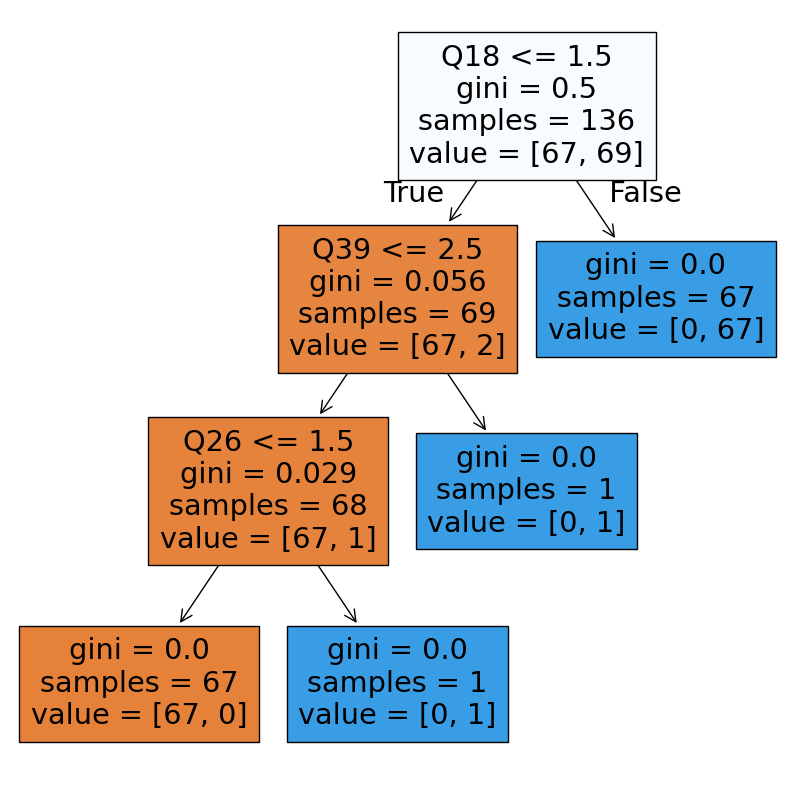

Accuracy:  0.9705882352941176 

Linear Model R-squared on Training Set: 0.9853

Linear Model R-squared on Test Set: 0.7532


In [26]:
y = df['Divorce'] # Target variable
X = df.drop(['Divorce'], axis=1) # Features/predictors

# Split the sample:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=69) # For replication purposes
from sklearn.tree import DecisionTreeClassifier # Import the tree classifier
from sklearn.tree import plot_tree # Plot the tree

# Fit decision tree:
cart = DecisionTreeClassifier() # Create a classifier object
cart = cart.fit(X_train, y_train) # Fit the classifier

# Visualize results:
plt.figure(figsize=(10,10))
var_names = cart.feature_names_in_
plot_tree(cart,filled=True,feature_names=var_names)
plt.show()

## Make Predictions on the Test Set:
y_hat = cart.predict(X_test)

## Confusion Matrix:
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/len(y_test) # Compute Accuracy
#acc = np.trace(tab)/len(y_test)  # Faster way to compute accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Fit the linear model on the training data
# Using fit_intercept=False as seen in the previous LinearRegression attempt
reg_lm = LinearRegression(fit_intercept=False)
reg_lm.fit(X_train, y_train)

# Evaluate performance on the training data
print(f"Linear Model R-squared on Training Set: {reg_lm.score(X_train, y_train):.4f}")

# Display coefficients
results_lm = pd.DataFrame({'variable': reg_lm.feature_names_in_, 'coefficient': reg_lm.coef_})

# Make predictions on the test set
y_pred_lm = reg_lm.predict(X_test)

# Evaluate performance on the test data
r2_test_lm = r2_score(y_test, y_pred_lm)

print(f"\nLinear Model R-squared on Test Set: {r2_test_lm:.4f}")


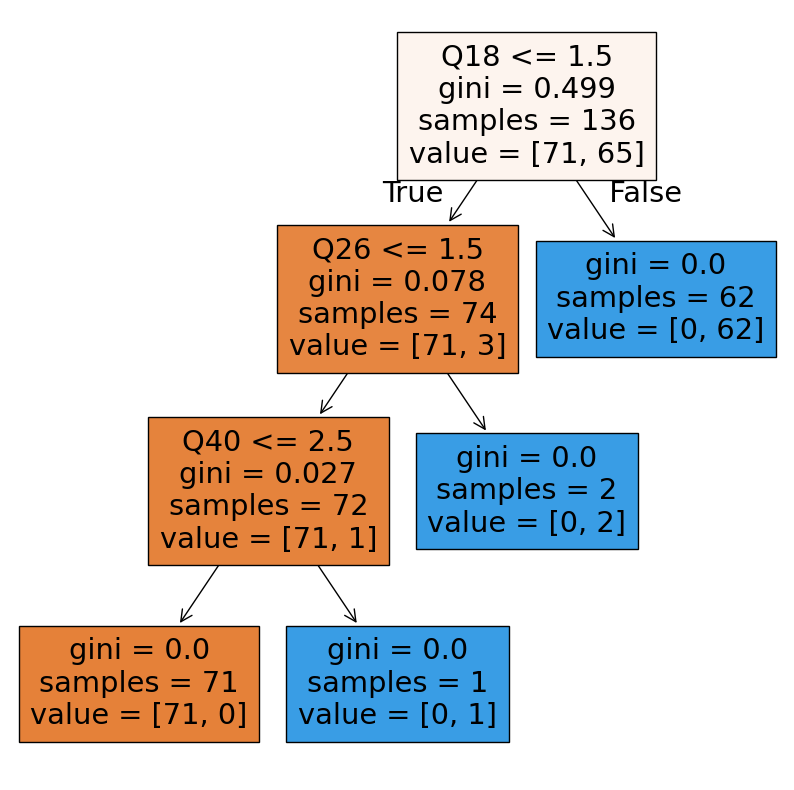

Accuracy:  1.0 

Linear Model R-squared on Training Set: 0.9700

Linear Model R-squared on Test Set: 0.9031


In [27]:
y = df['Divorce'] # Target variable
X = df.drop(['Divorce'], axis=1) # Features/predictors

# Split the sample:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=70) # For replication purposes
from sklearn.tree import DecisionTreeClassifier # Import the tree classifier
from sklearn.tree import plot_tree # Plot the tree

# Fit decision tree:
cart = DecisionTreeClassifier() # Create a classifier object
cart = cart.fit(X_train, y_train) # Fit the classifier

# Visualize results:
plt.figure(figsize=(10,10))
var_names = cart.feature_names_in_
plot_tree(cart,filled=True,feature_names=var_names)
plt.show()

## Make Predictions on the Test Set:
y_hat = cart.predict(X_test)

## Confusion Matrix:
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/len(y_test) # Compute Accuracy
#acc = np.trace(tab)/len(y_test)  # Faster way to compute accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Fit the linear model on the training data
# Using fit_intercept=False as seen in the previous LinearRegression attempt
reg_lm = LinearRegression(fit_intercept=False)
reg_lm.fit(X_train, y_train)

# Evaluate performance on the training data
print(f"Linear Model R-squared on Training Set: {reg_lm.score(X_train, y_train):.4f}")

# Display coefficients
results_lm = pd.DataFrame({'variable': reg_lm.feature_names_in_, 'coefficient': reg_lm.coef_})

# Make predictions on the test set
y_pred_lm = reg_lm.predict(X_test)

# Evaluate performance on the test data
r2_test_lm = r2_score(y_test, y_pred_lm)

print(f"\nLinear Model R-squared on Test Set: {r2_test_lm:.4f}")


5. Do linear models appear to have similar coefficients and predictions across train/test splits? Do trees?
No, we think that linear models appear to consist of different characteristics. Linear models have a tendency to have more stable coefficients and predictions throughout different train/test splits. On the other hand, tree-based models tend to be higher in variance and produce different coefficients and predictions with little to none changes to the training data.

6. True, even when models look very different across different training/split tests, they often produce very similar predictions. This happens because the underlying relationships in the data remain the same, and the models tend to learn similar decision boundaries even if the exact structure of the tree changes; structural differences do not necessarily translate into large differences in prediction outcomes.